In [1]:
import os
import math
import argparse
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
parser = argparse.ArgumentParser(description='Plothole Segmentation')
parser.add_argument("--path", type=str, default=os.path.join(os.getcwd(), "data"), help="Path to the data directory")
args = parser.parse_args(args=[])

In [3]:
path = args.path
if not os.path.exists(path):
    raise ValueError(f"Path {path} does not exist")

In [4]:
imagePath = os.path.join(path, "images")

trainPath = os.path.join(imagePath, "train")
validPath = os.path.join(imagePath, "valid")

trainImagePath = os.path.join(trainPath, "images")
trainLabelsPath = os.path.join(trainPath, "labels")

In [5]:
trainImage = sorted(os.listdir(trainImagePath))
trainLabels = sorted(os.listdir(trainLabelsPath))

if len(trainImage) != len(trainLabels):
    raise ValueError(f"Number of images and labels do not match")

for i in range(len(trainImage)):
    trainImage[i] = trainImage[i][:-4]
    trainLabels[i] = trainLabels[i][:-4]

imageDF = pd.DataFrame({"image": trainImage})
labelDF = pd.DataFrame({"label": trainLabels})

trainDF = pd.merge(imageDF, labelDF, left_on="image", right_on="label", how="inner")

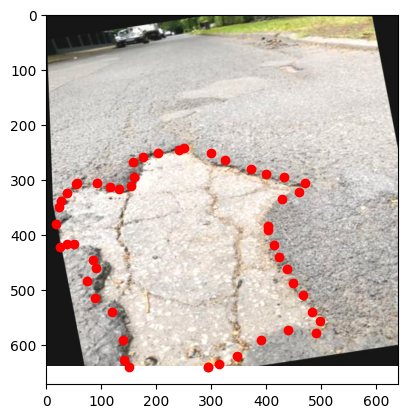

In [81]:
trainDF = trainDF.sample(frac=1).reset_index(drop=True)
for _, row in trainDF.iterrows():
    image = cv.imread(os.path.join(trainImagePath, row["image"] + ".jpg"))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    implot = plt.imshow(image)

    xlim = math.ceil(implot.axes.get_xlim()[1])
    ylim = math.ceil(implot.axes.get_ylim()[0])

    with open(os.path.join(trainLabelsPath, row["label"] + ".txt"), "r") as f:
        lines = f.readlines()
        for line in lines:
            line = [float(elem) for elem in line.strip().split(" ")[1:]]
            xs = []
            ys = []
            for i in range(len(line)):
                if i % 2 == 0:
                    xs.append(line[i] * xlim)
                else:
                    ys.append(line[i] * ylim)
            plt.scatter(xs, ys, color="red")
    plt.show()
    break